# Domain Coloring of Complex Functions

This Python script visualizes complex functions using a technique called domain coloring. The code uses NumPy for numerical computations and Matplotlib for plotting.

## The Complex Function

The function `complex_function(z)` takes a complex number `z` and applies the transformation `(z-1)/(z**2+z+1)`. This function is evaluated over a grid in the complex plane to produce a visualization of its behavior.

## How Domain Coloring Works

Domain coloring represents the complex function's output in a visual manner where:

- **Hue** corresponds to the argument (or angle) of the complex number. It is the phase component of the number in polar coordinates.
- **Value (Brightness)** is a representation of the function's magnitude. For enhanced visualization, this script uses `absContour` and `angleContour` to add contour lines based on the magnitude and argument of the complex number. This is followed by normalization to ensure the value remains within the range [0, 1]. A minimum value is also set to avoid complete darkness.
- **Saturation** is set to full (1) for maximum color intensity.

## Visualization

The script creates a meshgrid that spans the complex plane. For each point on the grid, it calculates the complex function's value. It then maps these values to colors in the HSV color space, which are subsequently converted to RGB for plotting.

The result is a color-coded visualization of the complex function where each color uniquely identifies a point in the function's output range. This is plotted using Matplotlib's `imshow` function, with the real and imaginary parts of `z` labeled on the x and y-axes respectively.

The title of the plot is 'Domain Coloring of f(z) = (z-1)/(z**2+z+1)', but it can be adjusted to match the actual function being visualized.

## Example Output

The script generates a plot as its output, which is a graphical representation of the complex function's domain coloring. Each color transition represents a change in the argument of the function's output, and the brightness variations indicate changes in the magnitude. The color wheel wraps around at 2π radians, creating a full spectrum of colors that correspond to the complex function's phase.

## Usage

To use the script, simply run it in a Python environment with the required libraries installed. The function can be modified to visualize different complex functions as needed.


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import hsv_to_rgb
from sympy import sympify
from asteval import Interpreter
from numpy import log,sin,cos,sqrt,exp

In [105]:
plt.rcParams['figure.figsize'] = [13, 10]
plt.rcParams['image.origin'] = 'lower'
plt.rcParams['image.interpolation']='none'

In [342]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
from asteval import Interpreter

class DomainColoring:
    """
    A class for domain coloring of complex functions. Domain coloring is a technique 
    used to visualize complex functions using colors and intensity to represent the 
    angle (argument) and magnitude (modulus) of function values respectively.
    """
    
    def __init__(self):
        """
        Initializes the DomainColoring class by creating a meshgrid for the complex plane.
        The grid ranges from -2 to 2 on both the real and imaginary axes with a resolution 
        of 1500x1500 points.
        """
        # Define the range for the real and imaginary parts
        x = np.linspace(-2, 2, 1500)
        y = np.linspace(-2, 2, 1500)
        
        # Create a meshgrid for the complex plane
        self.X, self.Y = np.meshgrid(x, y)
        
        # Combine the real and imaginary parts to form a complex grid
        self.Z = self.X + 1j * self.Y
        
    def evalExpression(self, expression, plotType="hsv"):
        """
        Evaluates a given complex function expression and plots the domain coloring.
        
        Parameters:
            expression (str): The complex function expression as a string.
            plotType (str): The style of the plot. Can be 'hsv', 'CartesianChecker', or 'polarChecker'.
        """
        # Evaluate the complex function
        F = self.complex_function(expression)
        
        # Plot the evaluated function with the specified style
        self.plotter(F, plotType)

    def plotter(self, F, style="hsv"):
        """
        Plots the domain coloring of a complex function on the complex plane.
        
        Parameters:
            F (np.ndarray): The complex function values evaluated at each point on the grid.
            style (str): The style of the plot. Can be 'hsv', 'CartesianChecker', or 'polarChecker'.
        """
        # Initialize the plot with labels and title
        plt.figure(figsize=(8, 8))
        plt.xlabel('Real axis')
        plt.ylabel('Imaginary axis')
        plt.title('Domain Coloring')
        
        # Plot based on the selected style
        if style == "hsv":
            # Calculate the hue based on the angle of the complex number
            hue = np.angle(F) / (2 * np.pi) % 1
            
            # Calculate the value (brightness) using contour functions for magnitude and angle
            value = self.absContour(np.abs(F)) + self.angleContour(np.angle(F))

            # Normalize the value to the range [0, 1]
            value = (value - value.min()) / (value.max() - value.min())
            minValue = 0.4
            value = value * (1 - minValue) + minValue

            # Set saturation to 1 for full color intensity
            saturation = np.ones_like(value)

            # Stack the HSV components and convert to an RGB image
            HSV = np.stack((hue, saturation, value), axis=-1)
            RGB = hsv_to_rgb(HSV)
            plt.imshow(RGB, extent=(-2, 2, -2, 2), origin='lower')

        elif style == "CartesianChecker":
            # Generate a checkerboard pattern based on the real and imaginary parts
            X = F.real
            Y = F.imag
            values = (np.floor(X) + np.floor(Y)) % 2
            plt.imshow(values, extent=(-2, 2, -2, 2), origin='lower', cmap="binary")

        elif style == "polarChecker":
            # Generate a checkerboard pattern based on the magnitude and angle
            values = (np.floor(2 * np.log2(np.abs(F))) + np.floor(np.pi * np.angle(F))) % 2
            plt.imshow(values, extent=(-2, 2, -2, 2), origin='lower', cmap="binary")

        # Display the plot
        plt.show()
        
    def absContour(self, x):
        """
        Generates a contour pattern based on the magnitude of the complex function values.
        
        Parameters:
            x (np.ndarray): The magnitudes of the complex function values.
        
        Returns:
            np.ndarray: The modified magnitudes to create a contour effect.
        """
        return 2 ** (np.log2(x) % 0.4)

    def angleContour(self, theta):
        """
        Generates a contour pattern based on the angle of the complex function values.
        
        Parameters:
            theta (np.ndarray): The angles of the complex function values.
        
        Returns:
            np.ndarray: The modified angles to create a contour effect.
        """
        return theta % (np.pi / 10)
    
    def complex_function(self, expression):
        """
        Parses and evaluates the complex function expression over the grid.
        
        Parameters:
            expression (str): The complex function expression to evaluate.
        
        Returns:
            np.ndarray: The evaluated complex function values over the grid.
        """
        # Initialize the interpreter with the grid as the complex variable 'z'
        aeval = Interpreter()
        aeval.symtable['z'] = self.Z
        
        # Evaluate the expression using the interpreter
        result = aeval(expression)
        return result



In [343]:
coloring = DomainColoring()

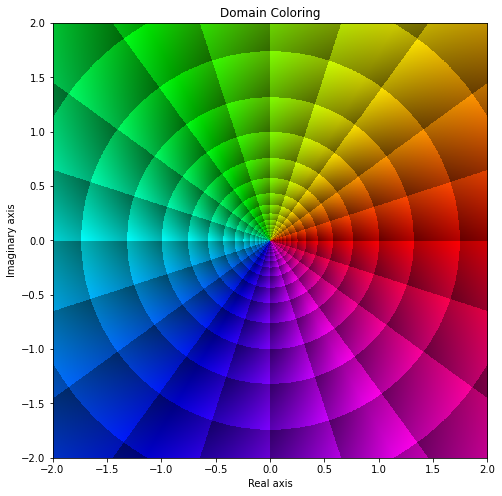

In [344]:
coloring.evalExpression("z")

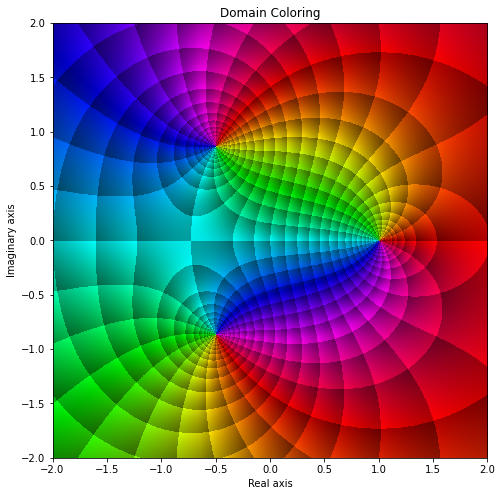

In [345]:
coloring.evalExpression("(z-1)/(z**2+z+1)")

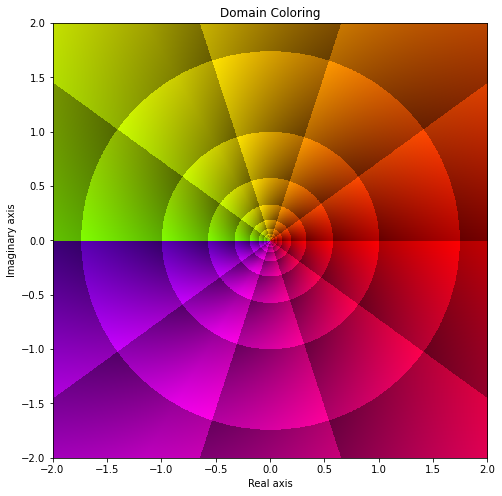

In [346]:
coloring.evalExpression("sqrt(z)")

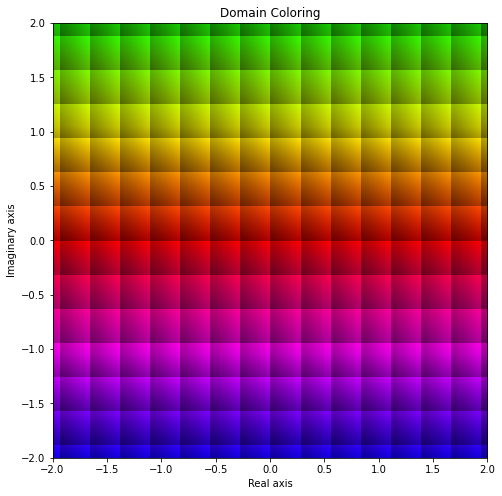

In [347]:
coloring.evalExpression("exp(z)")

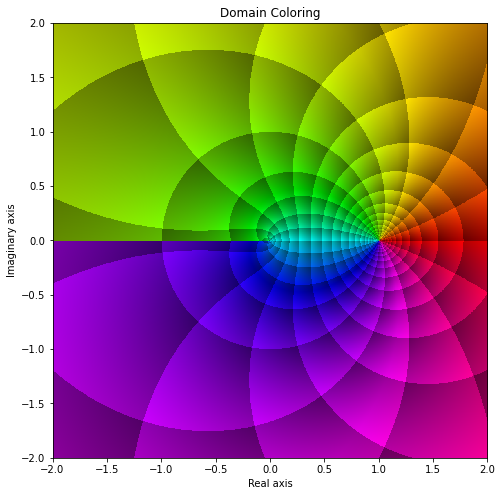

In [290]:
coloring.evalExpression("log(z)")

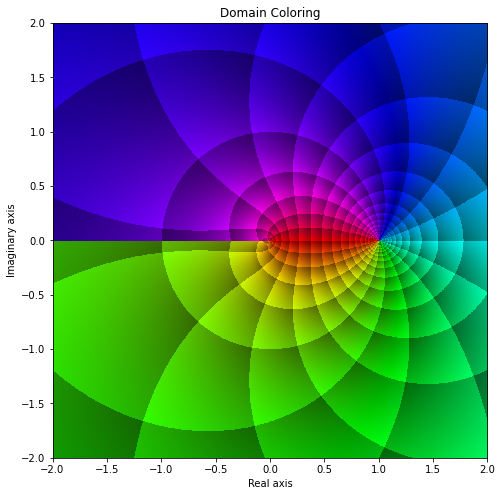

In [291]:
coloring.evalExpression("log(1/z)")

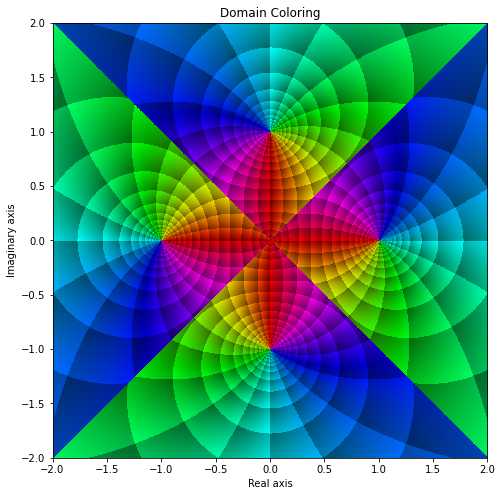

In [292]:
coloring.evalExpression("log(1/z**4)")

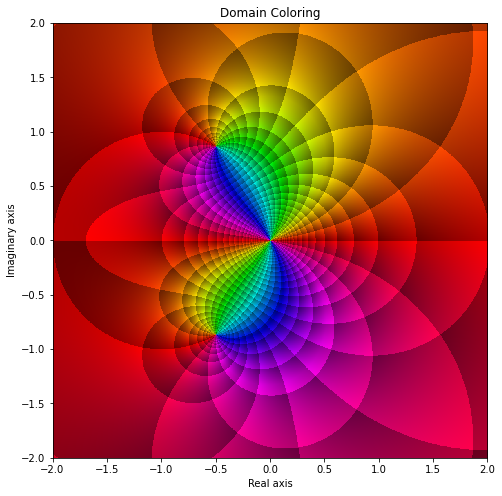

In [293]:
coloring.evalExpression("(z**2)/(z**2+z+1)")

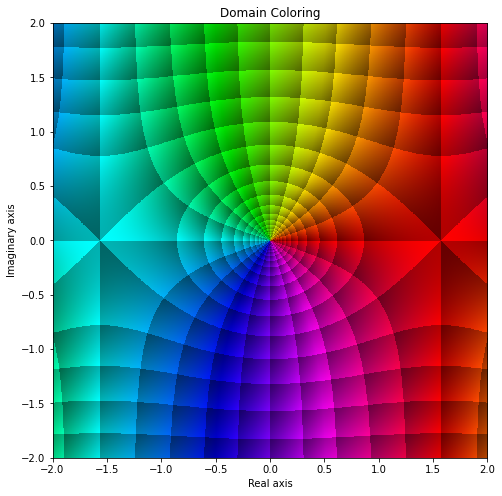

In [294]:
coloring.evalExpression("sin(z)")

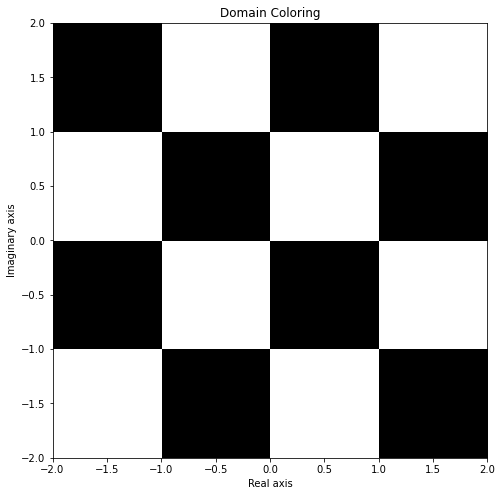

In [295]:
coloring.evalExpression("z","CartesianChecker")

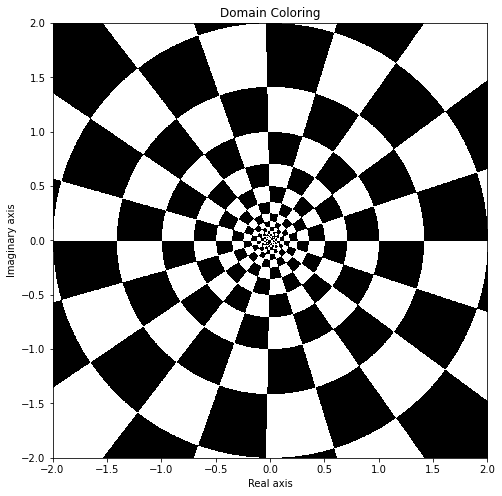

In [296]:
coloring.evalExpression("z","polarChecker")

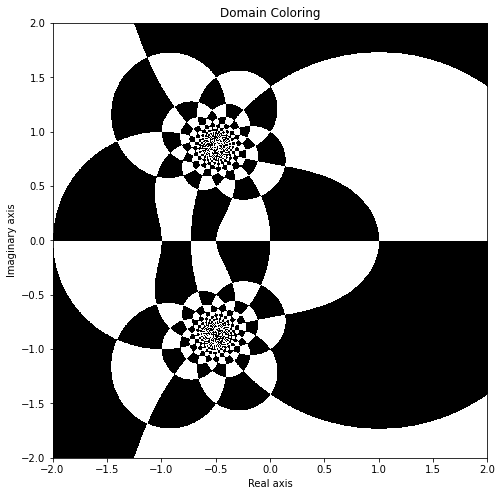

In [297]:
coloring.evalExpression("(z-1)/(z**2+z+1)","CartesianChecker")

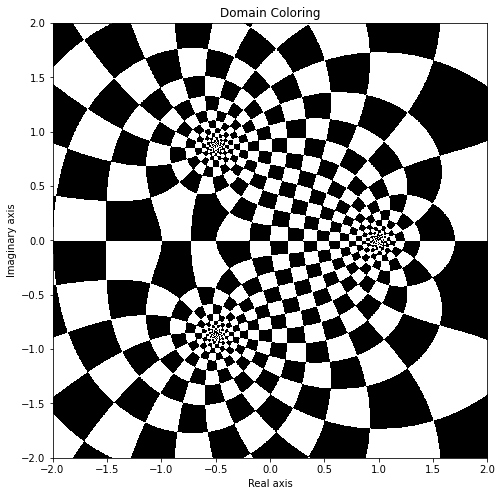

In [298]:
coloring.evalExpression("(z-1)/(z**2+z+1)","polarChecker")

721